<a href="https://colab.research.google.com/github/michaelgodoyf/tareas-proc-digi-multimedia/blob/main/Actividad_7_godoy_MICHAEL_ID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 7</h2></center>
<center><h3>Image</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Michael godoy ferreira</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


## 1. Operaciones usando Pytorch y OpenCV

### 1.1 Instala Numpy, Pytorch y OpenCV:
- Carga una imagen desde un archivo con extensión JPG, usando numpy, pytorch y opencv.
- Presenta la imagen
- Transforma la imagen de color a escala de grises usando cada uno de los paquetes
- Guarda la imagen nueva.
- Presenta la imagen transformada en el notebook.

<p align="justify">
Asegurate de presentar adecuandamente la imagen, usando Matplotlib u otro medio de ploteo.

In [2]:
!git clone https://github.com/Jorgecardenas1/EIE_401_MULTIMEDIA.git

Cloning into 'EIE_401_MULTIMEDIA'...
remote: Enumerating objects: 314, done.
remote: Counting objects: 100% (95/95), done.
remote: Compressing objects: 100% (81/81), done.
remote: Total 314 (delta 44), reused 63 (delta 14), pack-reused 219
Receiving objects: 100% (314/314), 11.16 MiB | 20.67 MiB/s, done.
Resolving deltas: 100% (138/138), done.


array([[[ 63,  88, 127],
        [ 58,  86, 132],
        [ 59,  86, 131],
        ...,
        [106, 102, 127],
        [105, 103, 130],
        [105, 101, 125]],

       [[ 59,  87, 129],
        [ 59,  87, 131],
        [ 59,  88, 130],
        ...,
        [107, 103, 128],
        [106, 102, 129],
        [105, 103, 129]],

       [[ 60,  88, 129],
        [ 61,  87, 129],
        [ 60,  88, 131],
        ...,
        [107, 103, 129],
        [106, 103, 127],
        [107, 102, 128]],

       ...,

       [[222, 147, 167],
        [220, 150, 169],
        [219, 151, 169],
        ...,
        [ 69,  95, 134],
        [ 69,  95, 134],
        [ 68,  95, 135]],

       [[221, 148, 164],
        [222, 150, 168],
        [220, 150, 168],
        ...,
        [ 69,  94, 133],
        [ 69,  94, 134],
        [ 69,  93, 134]],

       [[219, 156, 165],
        [221, 150, 167],
        [221, 148, 169],
        ...,
        [ 67,  94, 133],
        [ 70,  96, 131],
        [ 70,  90, 126]]], dtype=uint8)
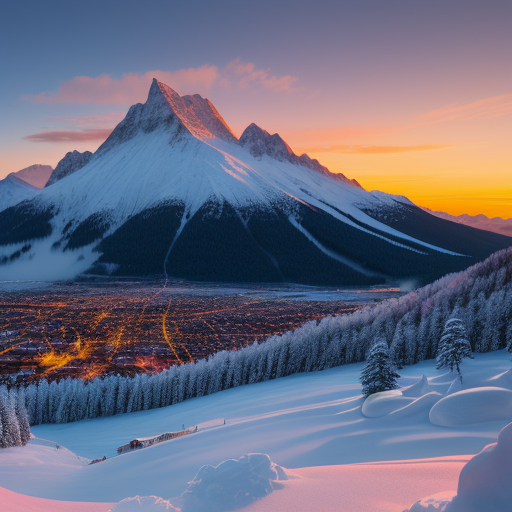

In [3]:
import cv2 as cv
imagen=cv.imread("/content/EIE_401_MULTIMEDIA/Actividades/Actividad 7/image.png")
imagen[:,:,[2,1,0]]

In [17]:
imagen_gray=cv.imread("/content/EIE_401_MULTIMEDIA/Actividades/Actividad 7/image.png",cv.IMREAD_GRAYSCALE)
imagen_gray
cv.imwrite("imagen_gris.png",imagen_gray)

True

array([[ 84,  82,  83, ..., 106, 106, 104],
       [ 83,  83,  84, ..., 107, 106, 106],
       [ 84,  84,  84, ..., 107, 106, 106],
       ...,
       [171, 173, 173, ...,  91,  91,  91],
       [171, 173, 172, ...,  90,  91,  90],
       [175, 173, 172, ...,  90,  92,  88]], dtype=uint8)
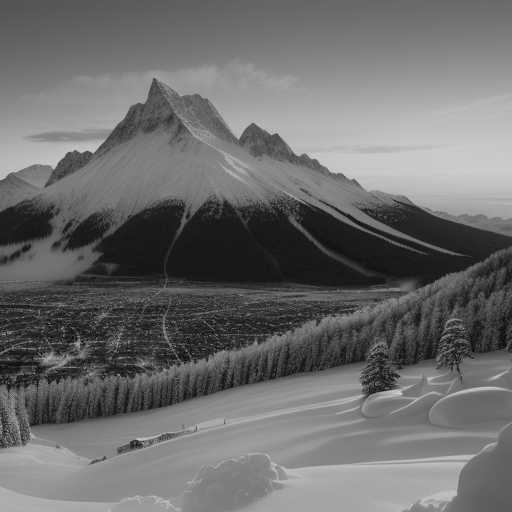

In [18]:
imagen_gray

## 2. Multiples operaciones con tensores
### ¡USA LA IMAGEN ADJUNTA image.png!

#### 2.1 Aplica una transformación puntual. Modifica el valor de los pixeles considerando un valor de umbral (threshold). la función de treshold debe ser una rampa con una pendiente dada (tu defines el valor de la pendiente) y cuyo valor mínimo será 0 y el máximo será 255 (valores típicos de los pixeles).

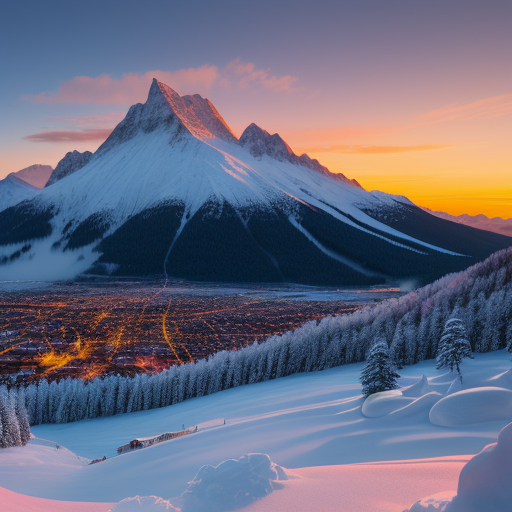

In [5]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

# Lee la imagen
img = cv.imread("/content/EIE_401_MULTIMEDIA/Actividades/Actividad 7/image.png")

# Convierte la imagen de BGR a RGB
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Mostrar la imagen
cv2_imshow(img)


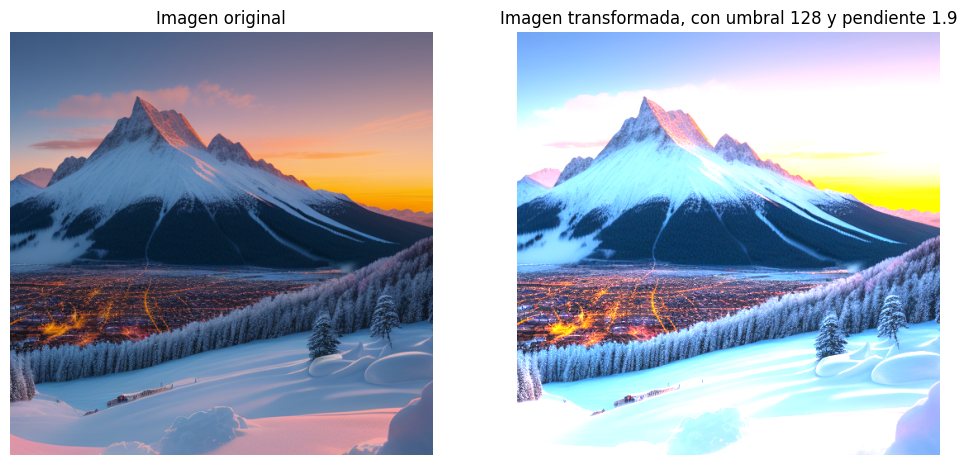

In [6]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
umbral = 128
pendiente = 1.9

# Definir la función de transformación
def umbral_transform(pixel_valor, umbral, pendiente):
    if pixel_valor < umbral:
        return max(0, pixel_valor * pendiente)
    else:
        return min(255, pixel_valor * pendiente)

# Transformar la imagen
img_trans_1 = np.zeros_like(img_rgb)
for k in range(img_rgb.shape[0]):
    for m in range(img_rgb.shape[1]):
        for c in range(img_rgb.shape[2]):
            img_trans_1[k, m, c] = umbral_transform(img_rgb[k, m, c], umbral, pendiente)

# Asegura de que los valores estén en el rango [0, 255] y convertir a uint8
img_final = np.clip(img_trans_1, 0, 255).astype(np.uint8)

# Mostrar las imágenes
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Imagen original")
plt.imshow(img_rgb)
plt.axis("off")
plt.subplot(1, 2, 2)
plt.title(f"Imagen transformada, con umbral {umbral} y pendiente {pendiente}")
plt.imshow(img_final)
plt.axis("off")
plt.show()





#### 2.2 Aplica una transformación en la vecindad.
- Debes hacer una vecindad con dimensiones de 5x5 pixeles.
- Aplica la transformación de tal forma que los pixeles cambien para tener el valor correspondiente al máximo de todos los vecinos.
- Debes hacer la misma operación a lo largo y ancho de toda la imagen. ESto implica, de forma iterativa, recorrer la imagen.



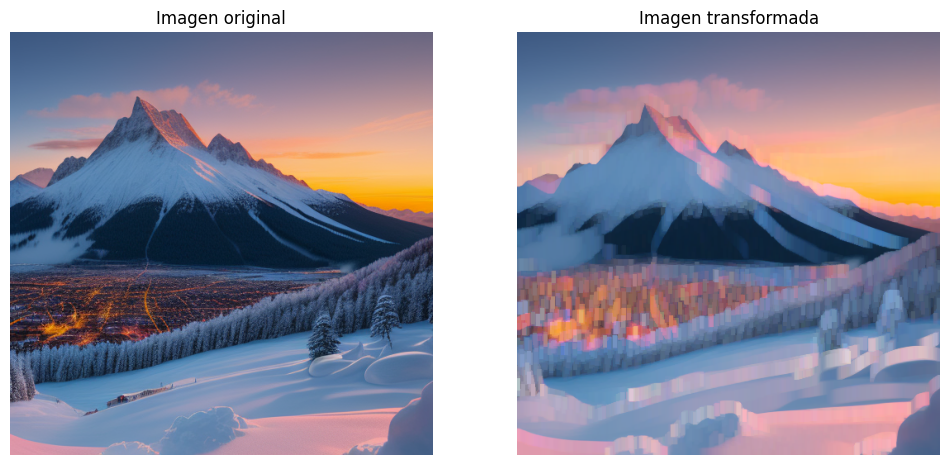

In [7]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Crea un kernel de dilatación de tamaño 15x5 con tipo de dato unsigned int de 8 bits
dilation_kernel = np.ones((15, 5), np.uint8)

# Crea una imagen vacía con las mismas dimensiones que img_rgb
transformed_image = np.zeros_like(img_rgb)

# Aplica dilatación a cada canal de la imagen original
for channel in range(img_rgb.shape[2]):
    transformed_image[:, :, channel] = cv.dilate(img_rgb[:, :, channel], dilation_kernel)

# Configura la visualización de las imágenes
plt.figure(figsize=(12, 6))

# Muedtra la imagen original
plt.subplot(1, 2, 1)
plt.title("Imagen original")
plt.imshow(img_rgb)
plt.axis("off")

# Muestra la imagen transformada
plt.subplot(1, 2, 2)
plt.title("Imagen transformada")
plt.imshow(transformed_image)
plt.axis("off")

# Muesdtra las imágenes en una ventana
plt.show()


#### 2.3 Aplica transformación de intensidad

- Debes hacer una vecindad con dimensiones de 10x10 pixeles.
- Aplica la transformación que aparece en la ecuación de tal forma que los pixeles cambien dependiendo de la posición (r) y el coeficiente c (de tu elección).
- Debes hacer la misma operación a lo largo y ancho de toda la imagen. ESto implica, de forma iterativa, recorrer la imagen.

<ipython-input-7-a8d8a010d461>:13: RuntimeWarning: divide by zero encountered in log
  return c * np.log(1 + pixel_valor)


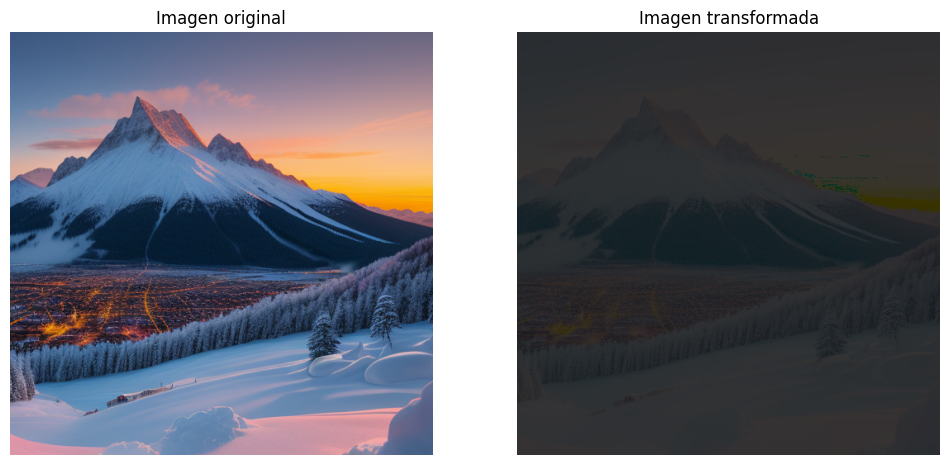

In [7]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
c = 10
nb = 10

# Define la función de transformación
def int_trans(pixel_valor, c):
    # Aplica la transformación logarítmica al valor del píxel
    return c * np.log(1 + pixel_valor)

# Crea una matriz para almacenar la imagen transformada
img_trans_2 = np.zeros_like(img_rgb, dtype=np.float32)

# Recorre la imagen en bloques de tamaño nb x nb
for i in range(0, img_rgb.shape[0], nb):
    for j in range(0, img_rgb.shape[1], nb):
        for k in range(img_rgb.shape[2]):
            # Extrae el bloque nb x nb
            nhb = img_rgb[i:i+nb, j:j+nb, k]
            # Aplica la transformación al bloque
            trans_nb = int_trans(nhb, c)
            # Guarda el bloque transformado en la imagen final
            img_trans_2[i:i+nb, j:j+nb, k] = trans_nb

# Asegura de que los valores estén en el rango [0, 255] y convertir a uint8
img_trans_2 = np.clip(img_trans_2, 0, 255).astype(np.uint8)

# Mostrar las imágenes
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Imagen original")
plt.imshow(img_rgb)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Imagen transformada")
plt.imshow(img_trans_2)
plt.axis("off")
plt.show()


#### 2.4 Operación con Kernel
- Realiza tres operaciones de convolución en cascada.
- Utiliza torch nn.Conv2d
- Debes calcular el stride, padding y demás parámetros para que obtengas 16 canales de salida.
- Muestra una imagen de cada canal resultante de la convolución.

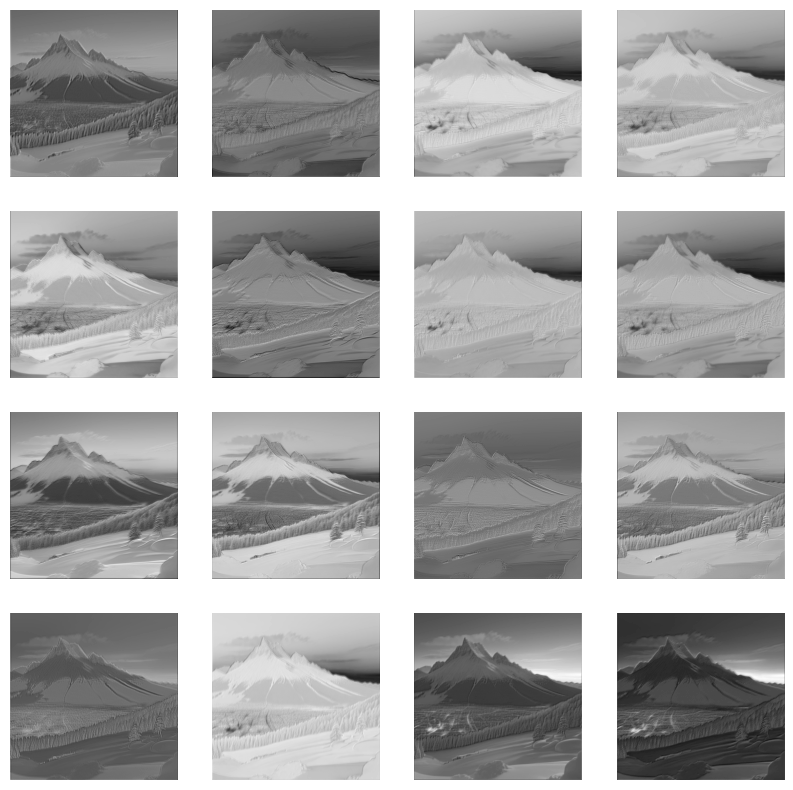

In [15]:
import  cv2
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# Ruta de la imagen
ruta_imagen = "/content/EIE_401_MULTIMEDIA/Actividades/Actividad 7/image.png"

# Lee la imagen
imagen = cv2.imread(ruta_imagen)

# Convierte la imagen de BGR a RGB
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

# Convierte la imagen a un tensor y normalizar los valores de los píxeles
tensor_imagen = torch.from_numpy(imagen_rgb).float() / 255.0

# Reorganizar las dimensiones del tensor a [batch_size, num_channels, height, width]
tensor_imagen = tensor_imagen.permute(2, 0, 1).unsqueeze(0)

# Definición de la red neuronal convolucional
class RedConvolucional(nn.Module):
    def __init__(self):
        super(RedConvolucional, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, stride=1, padding=1)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        return x

# Crear una instancia del modelo y pasar el tensor de imagen a través de él
modelo = RedConvolucional()
salida = modelo(tensor_imagen)

# Convertir la salida a un formato que se pueda visualizar
imagen_salida = salida[0].detach().numpy()

# Mostrar las imágenes de salida
plt.figure(figsize=(10, 10))
for i in range(0,16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(imagen_salida[i], cmap="gray")
    plt.axis("off")



## 3. Realiza la inversión de imagen

### 3.1 Utilizando estrictamente numpy, busca y usa una imagen binaria y realizar la inversión de dicha imagen.
### Recuerda adjuntar la imagen a la entrega de tu trabajo.


In [12]:
!git clone https://github.com/michaelgodoyf/tareas-proc-digi-multimedia

fatal: destination path 'tareas-proc-digi-multimedia' already exists and is not an empty directory.


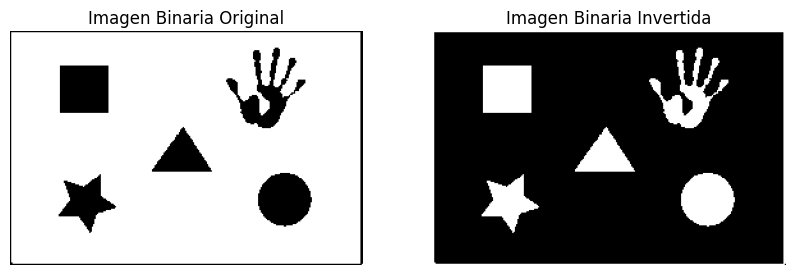

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Lee la imagen en escala de grises
ruta_imagen_binaria = "/content/tareas-proc-digi-multimedia/binaria.png"
imagen_binaria = cv2.imread(ruta_imagen_binaria, cv2.IMREAD_GRAYSCALE)

# Asegura de que la imagen es binaria (valores 0 y 255)
_, imagen_binaria = cv2.threshold(imagen_binaria, 127, 255, cv2.THRESH_BINARY)

# Convierto los valores de 255 a 1 para facilitar la inversión
binary_img = imagen_binaria // 255

# Obtengo las dimensiones de la imagen
M, N = binary_img.shape

# Creo una matriz para almacenar la imagen invertida
img_invertida = np.zeros(binary_img.shape)

# Recorrer la imagen binaria y realizo la inversión
for i in range(M):
    for j in range(N):
        if binary_img[i, j] == 1:
            img_invertida[i, j] = 0
        else:
            img_invertida[i, j] = 1

# Convierto los valores de 1 a 255 para mostrar la imagen correctamente
img_invertida = img_invertida * 255

# Muestro la imagen original y la invertida
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Imagen Binaria Original")
plt.imshow(binary_img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Imagen Binaria Invertida")
plt.imshow(img_invertida, cmap='gray')
plt.axis('off')

plt.show()


### 3.1 Usando Pytorch y opencv, realiza la inversión de la misma imagen.



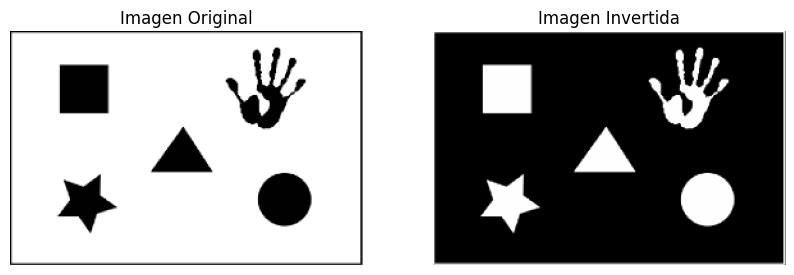

In [10]:
import torch
import cv2 as cv
import matplotlib.pyplot as plt

# Leer la imagen en escala de grises
img = cv.imread("/content/tareas-proc-digi-multimedia/binaria.png", cv.IMREAD_GRAYSCALE)


# Muestra la imagen original
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.title("Imagen Original")
plt.axis("off")

# Convierte la imagen a un tensor de PyTorch
img_tensor = torch.from_numpy(img).float()

# Normaliza los valores de los píxeles a 0 y 1
img_tensor = img_tensor / 255.0

# Invertir la imagen binaria (0 -> 1 y 1 -> 0)
img_invertida_tensor = 1 - img_tensor

# Convierte de nuevo a valores entre 0 y 255 y a tipo uint8
img_invertida = (img_invertida_tensor * 255).byte().numpy()

# Mostrar la imagen invertida
plt.subplot(1, 2, 2)
plt.imshow(img_invertida, cmap="gray")
plt.title("Imagen Invertida")
plt.axis("off")

plt.show()


## 4. Segmentación de imagen
#### 4.1 Realiza un algoritmo para dividir una imagen con 3 canales RGB de 512x512, en parches (secciones) de 16x16. Presenta cada parche generado de la imagen.
El algoritmo debe tolerar el cambio de imagen por una de menor tamano (128, 64). Claramente, en cada caso el número de parches será menor.
    

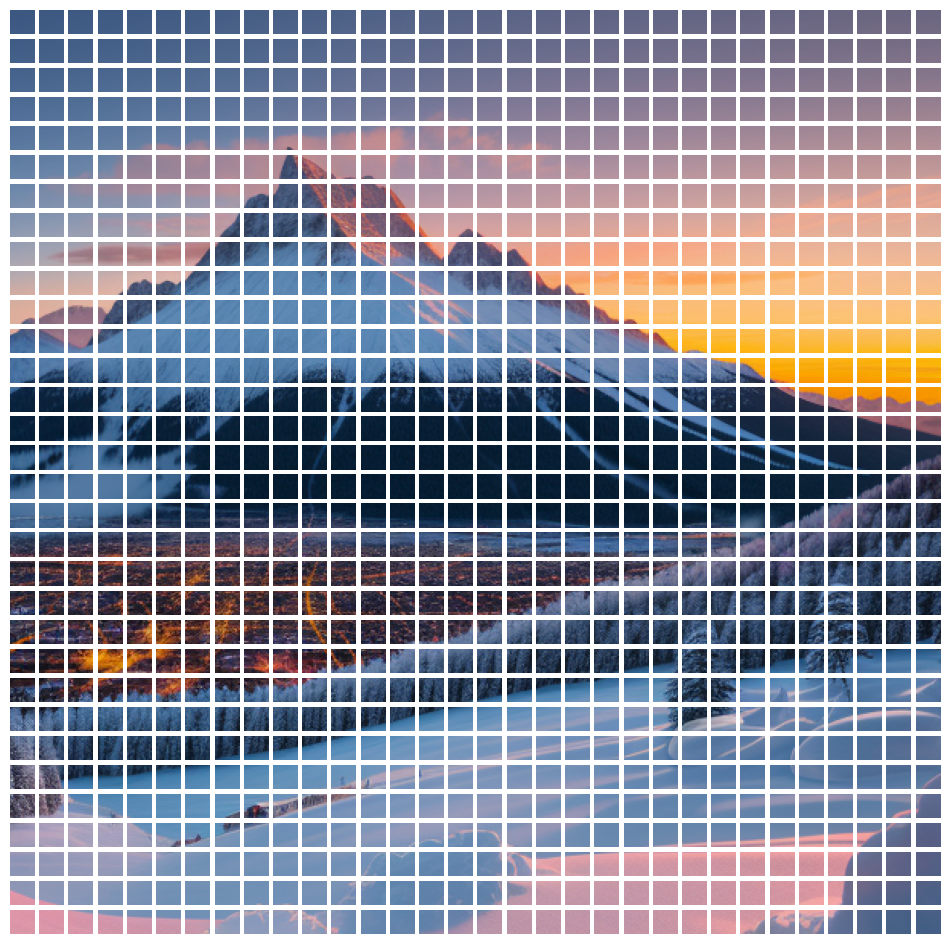

In [16]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

def dividir_en_parches(imagen, tam_parche=16):

    parches = []
    h, w, _ = imagen.shape  # Obtengo las dimensiones de la imagen

    # Recorre la imagen en bloques de tamaño tam_parche
    for i in range(0, h, tam_parche):
        for j in range(0, w, tam_parche):
            # Extrae un parche de la imagen
            parche = imagen[i:i + tam_parche, j:j + tam_parche]
            parches.append(parche)  # Añade el parche a la lista

    return parches

def mostrar_parches(parches, tam_parche=16):

    num_parches = len(parches)  # Número de parches
    num_columnas = int(np.sqrt(num_parches))  # Número de columnas en la cuadrícula
    num_filas = (num_parches + num_columnas - 1) // num_columnas  # Número de filas en la cuadrícula

    fig, ejes = plt.subplots(num_filas, num_columnas, figsize=(12, 12))

    # Recorre y muesta cada parche
    for i, parche in enumerate(parches):
        eje = ejes[i // num_columnas, i % num_columnas]
        eje.imshow(parche)
        eje.axis("off")

    # Elimina ejes no usados en la cuadrícula
    for i in range(num_parches, num_filas * num_columnas):
        fig.delaxes(ejes.flatten()[i])

    plt.show()

# Ruta de la imagen de entrada
ruta_imagen = "/content/EIE_401_MULTIMEDIA/Actividades/Actividad 7/image.png"

# Lee la imagen
imagen = cv.imread(ruta_imagen)

# Connv la imagen de BGR a RGB
imagen_rgb = cv.cvtColor(imagen, cv.COLOR_BGR2RGB)

# Obtengo las dimensiones de la imagen
h, w, _ = imagen_rgb.shape

# Divido la imagen en parches
parches = dividir_en_parches(imagen_rgb, tam_parche=16)

# Muestro los parches
mostrar_parches(parches, tam_parche=16)



## 5. Referencias
<p align="justify">
    
[OpenCV] https://docs.opencv.org/4.x/d7/da8/tutorial_table_of_content_imgproc.html

[inversion] https://medium.com/analytics-vidhya/inverting-an-image-using-numpys-broadcasting-method-1f5beb7f9fa5#:~:text=In%20order%20to%20invert%20the,negation)%20operation%20to%20the%20image.
